<a href="https://colab.research.google.com/github/aryanntated/DataScience_BookReview_System/blob/main/ML_Mini_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries
---




In [ ]:
# For DATA ANALYSIS

import pandas as pd
import numpy as np
import random as rnd
import re
import collections
import math
from collections import Counter

pd.set_option('display.max_columns', None)

# For DATA VISUALIZATION

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot')

Import Data
---



In [ ]:
data = pd.read_csv('/content/book_review.csv')

data.head()

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
0,Data Analysis Using R (Low Priced Edition): A ...,[ Dr Dhaval Maheta],6.75,6.75,500,4.4,23,55%,39%,6%,NaN,NaN,8.5 x 1.01 x 11 inches,2.53 pounds,English,"Notion Press Media Pvt Ltd (November 22, 2021)",978-1685549596,/Data-Analysis-Using-Low-Priced/dp/1685549594/...,https://www.amazon.com/Data-Analysis-Using-Low...
1,Head First Data Analysis: A learner's guide to...,NaN,33.72,21.49 - 33.72,484,4.3,124,61%,20%,9%,4%,6%,8 x 0.98 x 9.25 inches,1.96 pounds,English,"O'Reilly Media; 1st edition (August 18, 2009)",978-0596153939,/Head-First-Data-Analysis-statistics/dp/059615...,https://www.amazon.com/Head-First-Data-Analysi...
2,Guerrilla Data Analysis Using Microsoft Excel:...,"[ Oz du Soleil, and , Bill Jelen]",32.07,32.07,274,4.7,10,87%,13%,NaN,NaN,NaN,8.25 x 0.6 x 10.75 inches,1.4 pounds,English,"Holy Macro! Books; Third edition (August 1, 2022)",978-1615470747,/Guerrilla-Analysis-Using-Microsoft-Excel/dp/1...,https://www.amazon.com/Guerrilla-Analysis-Usin...
3,Python for Data Analysis: Data Wrangling with ...,[ William McKinney],53.99,53.99,547,4.6,"1,686",75%,16%,5%,2%,2%,7 x 1.11 x 9.19 inches,1.47 pounds,English,"O'Reilly Media; 2nd edition (November 14, 2017)",978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
4,Excel Data Analysis For Dummies (For Dummies (...,[ Paul McFedries],24.49,24.49,368,3.9,12,52%,17%,10%,10%,10%,7.38 x 0.83 x 9.25 inches,1.3 pounds,English,"For Dummies; 5th edition (February 3, 2022)",978-1119844426,/Excel-Data-Analysis-Dummies-Computer/dp/11198...,https://www.amazon.com/Excel-Data-Analysis-Dum...


Dataset Description
---



In [ ]:
print("Data information : ")
print()
print(data.info())
print()

Data information : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         830 non-null    object 
 1   author                        657 non-null    object 
 2   price                         722 non-null    float64
 3   price (including used books)  722 non-null    object 
 4   pages                         745 non-null    object 
 5   avg_reviews                   702 non-null    float64
 6   n_reviews                     702 non-null    object 
 7   star5                         702 non-null    object 
 8   star4                         635 non-null    object 
 9   star3                         554 non-null    object 
 10  star2                         451 non-null    object 
 11  star1                         328 non-null    object 
 12  dimensions                    644 non-null 

In [ ]:
print("Data shape : ")
print()
print(data.shape)
print()

Data shape : 

(830, 19)



In [ ]:
print("Data features : ")
print()
print(data.columns)
print()

Data features : 

Index(['title', 'author', 'price', 'price (including used books)', 'pages',
       'avg_reviews', 'n_reviews', 'star5', 'star4', 'star3', 'star2', 'star1',
       'dimensions', 'weight', 'language', 'publisher', 'ISBN_13', 'link',
       'complete_link'],
      dtype='object')



In [ ]:
print("Data description for numeric : ")
print()
print(data.describe())
print()

Data description for numeric : 

             price  avg_reviews
count   722.000000   702.000000
mean     46.491537     4.472080
std      63.292394     0.409608
min       0.990000     1.000000
25%      23.725000     4.325000
50%      39.490000     4.500000
75%      51.990000     4.700000
max    1318.740000     5.000000



In [ ]:
print("Data description for category : ")
print()
print(data.describe(include=['O']))
print()

Data description for category : 

                                                    title          author  \
count                                                 830             657   
unique                                                830             605   
top     Data Analysis Using R (Low Priced Edition): A ...  [ Al Sweigart]   
freq                                                    1               8   

       price (including used books) pages n_reviews star5 star4 star3 star2  \
count                           722   745       702   702   635   554   451   
unique                          523   376       289    67    48    33    20   
top                           39.99   360         1  100%   13%    7%    2%   
freq                             15    13        26    67    59    68   104   

       star1           dimensions       weight language  \
count    328                  644          651      759   
unique    19                  540          273       12   
top    

In [ ]:
# Check for Null Values

data.isnull().sum()


title                             0
author                          173
price                           108
price (including used books)    108
pages                            85
avg_reviews                     128
n_reviews                       128
star5                           128
star4                           195
star3                           276
star2                           379
star1                           502
dimensions                      186
weight                          179
language                         71
publisher                       116
ISBN_13                         165
link                              0
complete_link                     0
dtype: int64

In [ ]:
# show each row with na ratio for next cleaning stage

# built keys and values
dt_list_key = data.isna().sum().to_list()
dt_list_value = []

# compute na ratio
for index, i in enumerate(data.columns):
    na_ratio = dt_list_key[index] / data.shape[0]
    dt_list_value.append(round(na_ratio,2))

dict_df_na = dict(zip(data.columns, dt_list_value))
dict_df_na_sort = dict(sorted(dict_df_na.items(), key=lambda x: x[1], reverse=True))


dict_df_na_sort


{'star1': 0.6,
 'star2': 0.46,
 'star3': 0.33,
 'star4': 0.23,
 'dimensions': 0.22,
 'weight': 0.22,
 'author': 0.21,
 'ISBN_13': 0.2,
 'avg_reviews': 0.15,
 'n_reviews': 0.15,
 'star5': 0.15,
 'publisher': 0.14,
 'price': 0.13,
 'price (including used books)': 0.13,
 'pages': 0.1,
 'language': 0.09,
 'title': 0.0,
 'link': 0.0,
 'complete_link': 0.0}

Data Cleaning
---



In [ ]:
# cleaning columns for "star"

labels=["star5", "star4","star3", "star2", "star1"]

for j in labels:
    for i in range(len(data[j])):
        try:
            data.loc[i,j] = int(data.loc[i,j].replace("%",''))
        except:
            pass

In [ ]:
# check data
labels=["star5", "star4","star3", "star2", "star1"]

data[labels].head()

,star5,star4,star3,star2,star1
0,55,39,6,NaN,NaN
1,61,20,9,4,6
2,87,13,NaN,NaN,NaN
3,75,16,5,2,2
4,52,17,10,10,10


In [ ]:
# null ratio below 10% -> drop
# null ratio b/w 10% to 30% -> fill medium values


labels=["star5", "star4", "star3", "star2", "star1"]
labels_other = set(data.columns) - set(labels)


for i in range(len(data)):
    star_lst = []
    n = 0
    for j in labels:

        star_lst.append(data.loc[i,j])

    for k in star_lst:
        if math.isnan(k):
            # print(k)
            n+=1

    if n == 5:
        data.drop([i], axis = 0, inplace=True)

# reset index after drop row
data.reset_index(drop=True, inplace=True)

In [ ]:
# check na column and fillna with medium values

labels=["star5", "star4", "star3", "star2", "star1", "author"]
labels_other = set(data.columns) - set(labels)


for i in labels_other:
    freq_port = data[i].dropna().mode()[0]
    data[i] = data[i].fillna(freq_port)

In [ ]:
# check isna()
data['dimensions']
data.isnull().sum()

title                             0
author                          142
price                             0
price (including used books)      0
pages                             0
avg_reviews                       0
n_reviews                         0
star5                             0
star4                            67
star3                           148
star2                           251
star1                           374
dimensions                        0
weight                            0
language                          0
publisher                         0
ISBN_13                           0
link                              0
complete_link                     0
dtype: int64

In [ ]:
# cleaning columns for "pages"

r_check_english = r'[A-Za-z]'
for i in range(len(data['pages'])):

    pages = data.loc[i,'pages']
    str_pages = re.findall(r_check_english, pages)

    if str_pages != []:
         data.drop([i], axis = 0, inplace=True)


data.reset_index(drop=True, inplace=True)

for i in range(len(data['pages'])):
    pages = data.loc[i,'pages']
    data.loc[i,'pages'] = pages.replace(",","")

In [ ]:
# cleaning columns for "n_reviews"

for i in range(len(data['n_reviews'])):
    n_reviews = data.loc[i,'n_reviews']
    data.loc[i,'n_reviews'] = n_reviews.replace(",","")

In [ ]:
# transfer data type into numeric

labels=["star5", "star4","star3", "star2", "star1",'pages','n_reviews']
data[labels] = data[labels].astype('float64')

In [ ]:
# cleaning columns for "language"

r_1 = r"English"
r_2 = r"Spanish"
for i in range(len(data['language'])):

    rows = data.loc[i,'language']
    if not (re.findall(r_1, rows) or re.findall(r_2, rows)):
        data.loc[i,'language'] = 'English'
    elif re.findall(r_1, rows):
        data.loc[i,'language'] = 'English'
    else:
        data.loc[i,'language'] = 'Spanish'

In [ ]:
data.shape

(696, 19)

In [ ]:
# cleaning columns for "ISBN_13"

r_3 = r'\d{3}-\d{10}'
r_4 = r'(?<=-)\d{10}'

for i in range(len(data['ISBN_13'])):

    rows = data.loc[i,'ISBN_13']
    if not re.findall(r_3, rows):
        a = re.findall(r_4, data.loc[i-1,'ISBN_13'])[0]
        data.loc[i,'ISBN_13'] = '979-' + a


# reset_index after drop rows

data.reset_index(drop=True, inplace=True)

In [ ]:
# feature engineering convert dimensions into volume

r_5 = r'[0-9].[0-9]{1,2}'

for i in range(len(data['dimensions'])):
    vol = 1
    rows = data.loc[i,'dimensions']
    match = re.findall(r_5, rows)

    for j in match:
        vol *= float(j)

    data.loc[i,'volume'] = round(vol,2)

In [ ]:
data.dtypes

title                            object
author                           object
price                           float64
price (including used books)     object
pages                           float64
avg_reviews                     float64
n_reviews                       float64
star5                           float64
star4                           float64
star3                           float64
star2                           float64
star1                           float64
dimensions                       object
weight                           object
language                         object
publisher                        object
ISBN_13                          object
link                             object
complete_link                    object
volume                          float64
dtype: object

# Data Visualization and Analysis
---



## 1. Scatter plot

In [ ]:
fig = px.scatter(data, x="price", y="pages",color='avg_reviews',color_continuous_scale='RdBu_r'
          ,size='n_reviews')

fig.update_xaxes(range=[0,100])
fig.update_yaxes(range=[0,1000])

fig.show()

(A) Group by **avg_reviews**

---

In [ ]:
a=(data['n_reviews']+3000).tolist()
fig = px.scatter(data, x="price", y="pages", size=a,facet_col="avg_reviews",color='star5',color_continuous_scale='RdBu_r')


fig.update_layout(
    width = 11100,
    height = 640,
    title = "Price, Number of Pages, Average Reviews and Percentage of 5 stars per Average Review"
)


fig.show()


These scatter plots show the number of books according to the avg reviews and the 5 star rating.

# 2.Correlation Matrix


<ipython-input-141-0dd0ff6914b1>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

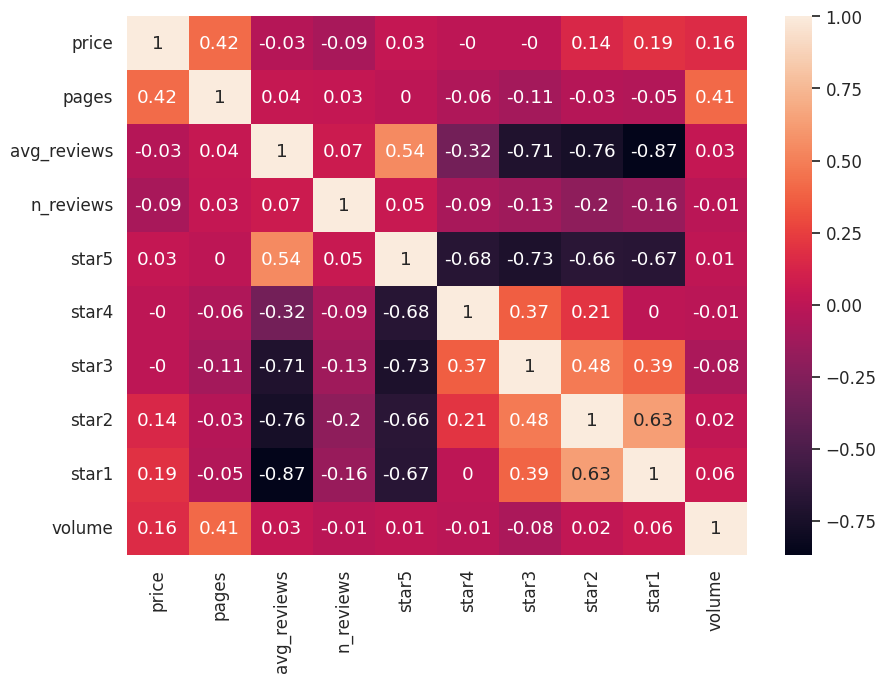

In [ ]:
# attemp to find other potential influence index
corr = data.corr().round(2)

# Plot the correlation matrix using seaborn's heatmap function
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.1)

sns.heatmap(corr, annot=True)

# the influence factor of book price are pages and star5, but star5 is a little trending to price

## 3. Parallel Coordinates plot

In [ ]:
fig = px.parallel_coordinates(data, color="price", labels=["star5", "star4","star3", "star2", "star1", "pages",],
                              color_continuous_scale=['rgb(10,6,135)','rgb(181,228,255)','rgb(215,73,12)','rgb(165,13,13)','rgb(119,50,61)'],
                              color_continuous_midpoint=137)
fig.show()

# 15 most popular book


In [ ]:
# bar chart ranking sorting by avg_reviews

datalargest=data['n_reviews'].nlargest(15).astype(int).sort_index()
fifteen_most_reviewed_books = data[data['n_reviews'] >= datalargest.min()]

fifteen_most_reviewed_books = fifteen_most_reviewed_books.sort_values(['avg_reviews'], ascending=False)

fifteen_most_reviewed_books.head(

)

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link,volume
158,Designing Data-Intensive Applications: The Big...,[ Martin Kleppmann],23.37,23.37,611.0,4.8,3443.0,85.0,9.0,3.0,1.0,2.0,7.01 x 1.24 x 9.17 inches,2.15 pounds,English,"O'Reilly Media; 1st edition (May 2, 2017)",978-1449373320,/Designing-Data-Intensive-Applications-Reliabl...,https://www.amazon.com/Designing-Data-Intensiv...,79.71
456,Monty Python's Life Of Brian - The Immaculate ...,NaN,9.48,9.48,360.0,4.8,3678.0,86.0,9.0,4.0,1.0,NaN,6.75 x 5 x 0.25 inches; 1.6 Ounces,3.53 ounces,English,"Packt Publishing (April 29, 2022)",979-1801071871,/Monty-Pythons-Life-Brian-Immaculate/dp/B000VE...,https://www.amazon.com/Monty-Pythons-Life-Bria...,2.70
493,Monty Python's Life Of Brian [DVD],NaN,18.85,18.85,360.0,4.8,3678.0,86.0,9.0,4.0,1.0,NaN,7.5 x 5.38 x 0.6 inches; 4 Ounces,3.53 ounces,English,"Packt Publishing (April 29, 2022)",979-0262542364,/Monty-Pythons-Brian-Graham-Chapman/dp/6305388...,https://www.amazon.com/Monty-Pythons-Brian-Gra...,24.21
21,Monty Python and the Holy Grail (Special Edition),NaN,9.99,9.99,360.0,4.7,10103.0,85.0,8.0,3.0,1.0,2.0,7.5 x 5.5 x 0.5 inches; 3.2 Ounces,3.53 ounces,English,"Packt Publishing (April 29, 2022)",979-1492089469,/Monty-Python-Holy-Grail-Special/dp/B00005O3VC...,https://www.amazon.com/Monty-Python-Holy-Grail...,66.00
505,Monty Python's The Meaning of Life [Blu-ray],NaN,9.99,9.99,360.0,4.7,3337.0,82.0,10.0,4.0,2.0,2.0,6.75 x 5.3 x 0.35 inches; 2.4 Ounces,3.53 ounces,English,"Packt Publishing (April 29, 2022)",979-1442445765,/Monty-Pythons-Meaning-Life-Blu-ray/dp/B07G24K...,https://www.amazon.com/Monty-Pythons-Meaning-L...,30.05


In [ ]:
fig = px.bar(fifteen_most_reviewed_books, x='title', y='avg_reviews' ,log_y=True)
fig.update_layout(
    width = 800,
    height = 1640,
    title = "Fifteen Most Reviewed Books based on Average Reviews"
)
fig.show()

# Top 10 machine learning books

In [ ]:
ML_books = data[data['title'].str.contains("Machine Learning")]

# Python books with most reviews and highest average rating
best_ML_books = ML_books.nlargest(10, ['n_reviews','avg_reviews'])
best_ML_books

,title,author,price,price (including used books),pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link,volume
415,"Hands-On Machine Learning with Scikit-Learn, K...",[ Aurélien Géron],57.49,57.49,856.0,4.8,3129.0,85.0,10.0,3.0,1.0,2.0,7 x 1.2 x 9.2 inches,2.8 pounds,English,"O'Reilly Media; 2nd edition (October 15, 2019)",978-1492032649,/Hands-Machine-Learning-Scikit-Learn-TensorFlo...,https://www.amazon.com/Hands-Machine-Learning-...,11.04
601,Machine Learning For Absolute Beginners: A Pla...,NaN,39.99,39.99,167.0,4.5,1123.0,68.0,18.0,8.0,3.0,2.0,7 x 0.75 x 9 inches,3.53 ounces,English,"Scatterplot Press; 2nd edition (June 21, 2017)",979-1617295874,/Machine-Learning-Absolute-Beginners-Introduct...,https://www.amazon.com/Machine-Learning-Absolu...,0.75
616,The Hundred-Page Machine Learning Book,[ Andriy Burkov],31.99,26.50 - 31.99,160.0,4.6,839.0,80.0,10.0,4.0,2.0,3.0,7.5 x 0.38 x 9.25 inches,13.8 ounces,English,"Andriy Burkov (January 13, 2019)",978-1999579500,/Hundred-Page-Machine-Learning-Book/dp/1999579...,https://www.amazon.com/Hundred-Page-Machine-Le...,26.36
619,Pattern Recognition and Machine Learning (Info...,[ Christopher M. Bishop],105.22,90.99 - 105.22,738.0,4.6,687.0,76.0,13.0,6.0,3.0,2.0,7.7 x 1.3 x 10.2 inches,4.73 pounds,English,"Springer (August 17, 2006)",978-0387310732,/Pattern-Recognition-Learning-Information-Stat...,https://www.amazon.com/Pattern-Recognition-Lea...,2.00
581,Mathematics for Machine Learning,NaN,48.99,48.99,398.0,4.7,608.0,80.0,13.0,3.0,2.0,2.0,7 x 0.92 x 10 inches,1.76 pounds,English,Cambridge University Press; 1st edition (April...,978-1108455145,/Mathematics-Machine-Learning-Peter-Deisenroth...,https://www.amazon.com/Mathematics-Machine-Lea...,0.92
514,Introduction to Machine Learning with Python: ...,NaN,49.35,29.76 - 49.35,398.0,4.5,591.0,75.0,15.0,3.0,3.0,5.0,7 x 0.82 x 9.19 inches,1.3 pounds,English,"O'Reilly Media; 1st edition (November 15, 2016)",978-1449369415,/Introduction-Machine-Learning-Python-Scientis...,https://www.amazon.com/Introduction-Machine-Le...,7.54
46,Machine Learning: 4 Books in 1: The #1 Beginne...,"[ Andrew Park, and , Russell Newton]",39.99,39.99,360.0,4.7,290.0,83.0,10.0,3.0,1.0,3.0,7 x 0.75 x 9 inches,3.53 ounces,English,"Packt Publishing (April 29, 2022)",979-0393347777,/Data-Science-Beginners-Programming-Learning/d...,https://www.amazon.com/Data-Science-Beginners-...,0.75
208,PYTHON: Learn Coding Programs with Python Prog...,[ TechExp Academy],24.90,19.66 - 24.90,400.0,4.1,273.0,60.0,15.0,12.0,5.0,8.0,8 x 0.91 x 10 inches,1.9 pounds,English,"Independently published (December 24, 2021)",979-8358890916,/PYTHON-Programming-Analytics-Beginners-Manusc...,https://www.amazon.com/PYTHON-Programming-Anal...,0.91
414,Ultimate Step by Step Guide to Machine Learnin...,NaN,39.99,39.99,70.0,4.2,271.0,62.0,15.0,12.0,5.0,6.0,7 x 0.75 x 9 inches,3.53 ounces,English,"Packt Publishing (April 29, 2022)",979-8589463590,/Ultimate-Guide-Machine-Learning-Python-ebook/...,https://www.amazon.com/Ultimate-Guide-Machine-...,0.75
624,Machine Learning Design Patterns: Solutions to...,"[ Valliappa Lakshmanan, Sara Robinson, et al.]",36.99,36.99,408.0,4.6,263.0,73.0,17.0,6.0,3.0,1.0,9.06 x 0.94 x 6.85 inches,1.45 pounds,English,"O'Reilly Media; 1st edition (November 10, 2020)",979-1633430037,/Machine-Learning-Design-Patterns-Preparation/...,https://www.amazon.com/Machine-Learning-Design...,58.34


# Wordcloud

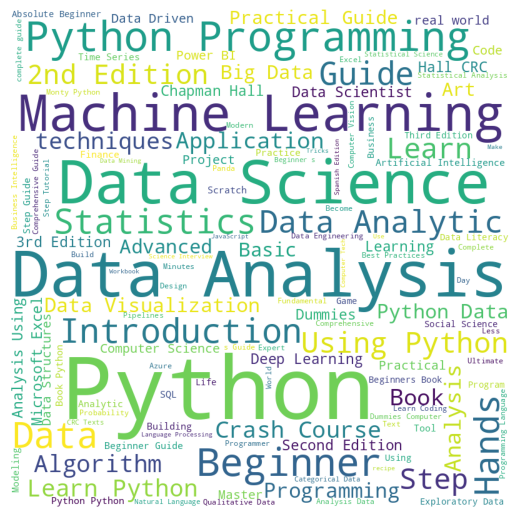

In [ ]:
avg_ratings = data.groupby('title')['avg_reviews'].mean().reset_index()
from wordcloud import WordCloud, STOPWORDS

# Create a string of book titles and their average ratings
title_ratings = ''
for index, row in avg_ratings.iterrows():
    title_ratings += (row['title'] + ' ') * int(row['avg_reviews'])

# Create a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = set(STOPWORDS),
                      min_font_size = 10).generate(title_ratings)


# Plot the word cloud
plt.figure(figsize = (10, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

This wordcloud shows the word that has been used most frequently in the titles.
It also depicts that all the books of the dataset are data science oriented.

In [ ]:
ig = px.bar(fifteen_most_reviewed_books, x='title', y=['star5','star4','star3','star2','star1'],log_y=True)
fig.update_layout(
    width = 800,
    height = 1640,
    title = "Fifteen Most Reviewed Books: Number of Stars Percentage"
)
fig.show()

This stacked bar graph explains how star rating is given to the top 15 books of the dataset.


This

In [ ]:
x = data.nunique()
print(x)

title                           696
author                          511
price                           393
price (including used books)    474
pages                           345
avg_reviews                      22
n_reviews                       289
star5                            67
star4                            48
star3                            33
star2                            20
star1                            19
dimensions                      500
weight                          262
language                          2
publisher                       607
ISBN_13                         555
link                            696
complete_link                   696
volume                          457
dtype: int64


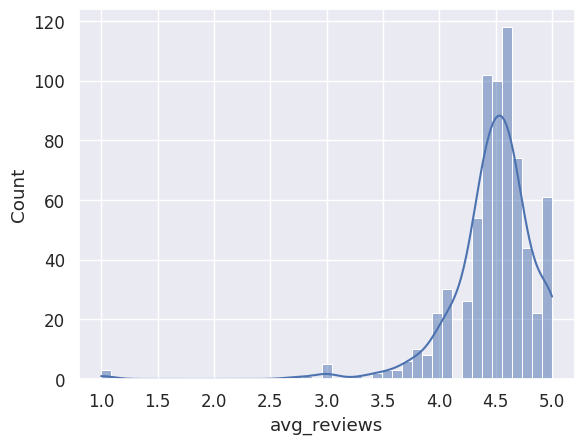

In [ ]:
sns.histplot(data=data, x='avg_reviews', kde=True)
plt.show()

Most of the books are given an average of 4.5 ratings.
Therefore the dataset consists of a good collection of books.

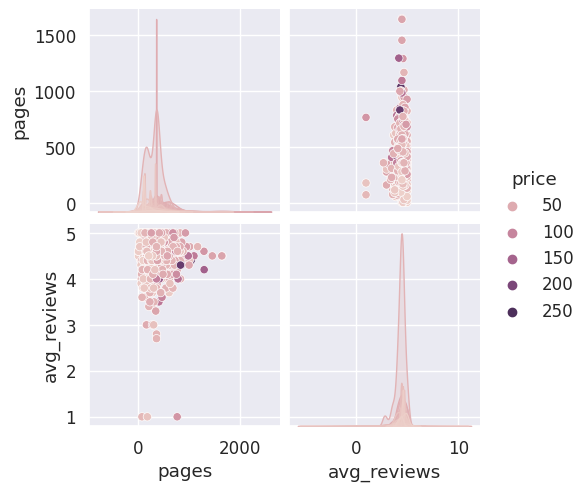

In [ ]:
sns.pairplot(data=data, vars=['pages','avg_reviews'], hue='price')
plt.show()

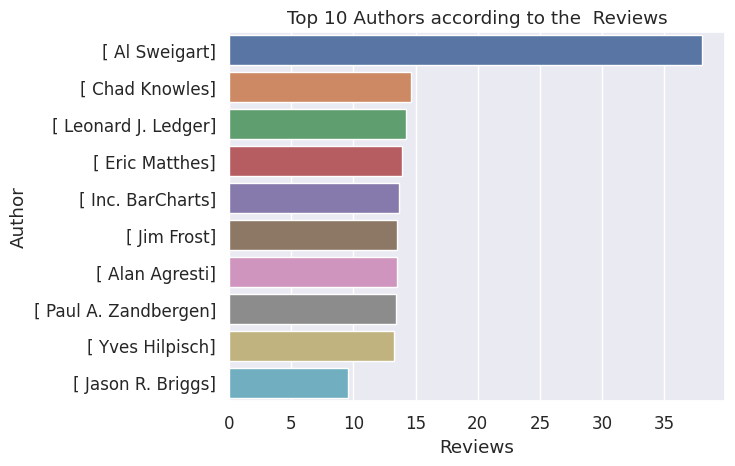

In [ ]:
author_reviews = data.groupby('author')['avg_reviews'].sum().reset_index()

top_authors = author_reviews.sort_values('avg_reviews', ascending=False).head(10)

sns.barplot(x='avg_reviews', y='author', data=top_authors)

plt.xlabel('Reviews')
plt.ylabel('Author')
plt.title('Top 10 Authors according to the  Reviews')

plt.show()

Al Sweigart's books have the highest reviews and hence can be considered as the best author.

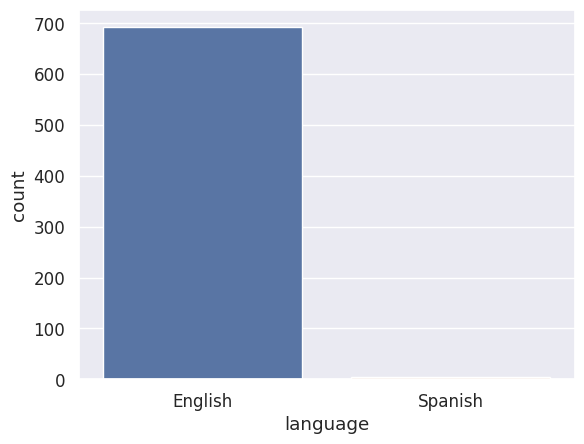

In [ ]:
sns.countplot(data=data, x='language')
plt.show()

Language attribute is inbalanced because very few books are written in spanish.

